### Problem Statement

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [14]:
# # Dataset Credits

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M.

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [2]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv('breast_cancer_data.csv')
print(f"Number of rows in data: {df.shape[0]}")
df.head()

Number of rows in data: 286


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [3]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
df.isna().sum()


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

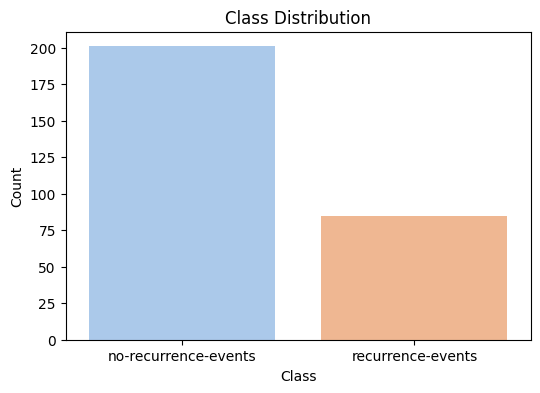

In [4]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='pastel')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [5]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.

categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [30]:
# Step 1: Split the dataset into training and test sets
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=200)
model.fit(X_training, y_training)

LogisticRegression(max_iter=200)

In [32]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.88      0.75      0.81        48
   recurrence-events       0.29      0.50      0.37        10

            accuracy                           0.71        58
           macro avg       0.59      0.62      0.59        58
        weighted avg       0.78      0.71      0.73        58



### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [33]:
# Step 1: Apply undersampling to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_training_rus, y_training_rus = rus.fit_resample(X_training, y_training)
print(f"Value Counts: ", y_training_rus.value_counts())

Value Counts:  class
no-recurrence-events    68
recurrence-events       68
Name: count, dtype: int64


In [34]:
# Step 2: Train a Logistic Regression model using the undersampled training data
model.fit(X_training_rus, y_training_rus)

LogisticRegression(max_iter=200)

In [35]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

                      precision    recall  f1-score   support

no-recurrence-events       0.54      0.81      0.65        27
   recurrence-events       0.71      0.39      0.50        31

            accuracy                           0.59        58
           macro avg       0.62      0.60      0.57        58
        weighted avg       0.63      0.59      0.57        58



### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [36]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_training_smote, y_training_smote = smote.fit_resample(X_training, y_training)
print(f"Value Counts: ", y_training_smote.value_counts())
# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model.fit(X_training_smote, y_training_smote)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

Value Counts:  class
recurrence-events       160
no-recurrence-events    160
Name: count, dtype: int64
                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.82      0.75        34
   recurrence-events       0.65      0.46      0.54        24

            accuracy                           0.67        58
           macro avg       0.66      0.64      0.64        58
        weighted avg       0.67      0.67      0.66        58



### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [37]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
tomek = SMOTETomek(random_state=42)
X_training_tomek, y_training_tomek = tomek.fit_resample(X_training, y_training)
print(f"Value Counts: ", y_training_tomek.value_counts())

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model.fit(X_training_tomek, y_training_tomek)

# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

Value Counts:  class
recurrence-events       151
no-recurrence-events    151
Name: count, dtype: int64
                      precision    recall  f1-score   support

no-recurrence-events       0.68      0.85      0.76        33
   recurrence-events       0.71      0.48      0.57        25

            accuracy                           0.69        58
           macro avg       0.69      0.66      0.66        58
        weighted avg       0.69      0.69      0.68        58

